# Weather 28-08-2018

In [1]:
import csv
import datetime
import matplotlib.pyplot as plt
import numpy
import matplotlib.dates as mdates

input_file = "weather-28-08-2018.csv"
time = []
pressure = [] 
humidity = []
temperature = []
wind_average = []
wind_direction = []
wind_gust = []

myFmt = mdates.DateFormatter('%H:%M')


with open(input_file) as infile:
    data = csv.reader(infile, delimiter=',')
    for row in list(data)[1:]:
        #local_time,pressure,humidity,temperature,wind_average,wind_direction,wind_gust
        time.append(datetime.datetime.strptime(row[0], "%Y-%m-%dT%H:%M:%S"))
        pressure.append(float(row[1]))
        humidity.append(float(row[2]))
        temperature.append(float(row[3]))
        wind_average.append(float(row[4])*1.94384) # knots
        wind_direction.append(float(row[5])*360/16) # degree
        wind_gust.append(float(row[6])*1.94384) # knots


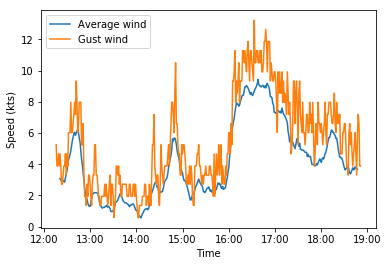

In [2]:
def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

ave_sample = 10
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_formatter(myFmt)
ax.plot(time[int(ave_sample/2):-int(ave_sample/2-1)], running_mean(wind_average,ave_sample), label="Average wind")
ax.plot(time, wind_gust, label="Gust wind")
ax.set_xlabel("Time")
ax.set_ylabel("Speed (kts)")
ax.legend()

Text(0,0.5,'Wind direction')

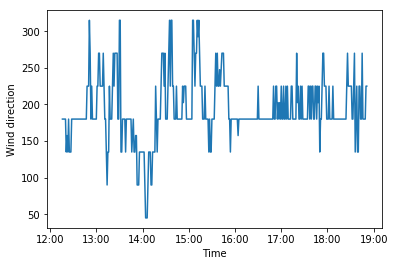

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_formatter(myFmt)
ax.plot(time, wind_direction, label="Average wind")
ax.set_xlabel("Time")
ax.set_ylabel("Wind direction")

Text(0,0.5,'Temperature')

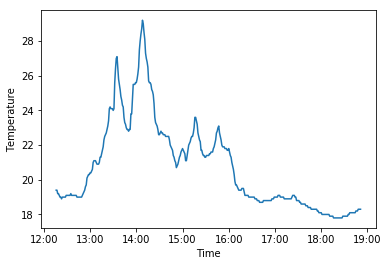

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_formatter(myFmt)
ax.plot(time, temperature, label="Temperature")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature")

Text(0,0.5,'Pressure')

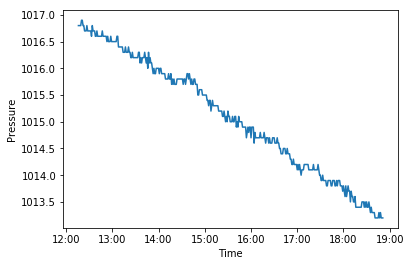

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_formatter(myFmt)
ax.plot(time, pressure, label="Pressure")
ax.set_xlabel("Time")
ax.set_ylabel("Pressure")